In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as CM
from matplotlib.colors import LogNorm,PowerNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean

import pandas as pd
import geopandas as gpd
from shapely.geometry import *
#import matplotlib.pylab as plt
from scipy.interpolate import griddata

In [30]:
fp ="D:/data/map/province_2004.shp"
mapfile = gpd.read_file(fp,encoding='gbk')

In [31]:
mapfile

,AREA,PERIMETER,LEVEL1_,LEVEL1_ID,AD2004,NAME2004,geometry
0,54.482100,70.132800,1,1,230000,黑龙江省,"POLYGON ((132.8446807861328 45.06007385253906,..."
1,129.067000,133.994000,2,2,150000,内蒙古自治区,"POLYGON ((114.0350036621094 40.60723876953125,..."
2,21.307000,43.516200,3,3,220000,吉林省,"(POLYGON ((125.255485534668 42.31010818481445,..."
3,0.048732,10.530200,4,4,20000,None,(POLYGON ((130.6258850097656 42.41724395751953...
4,175.086000,86.099200,5,5,650000,新疆维吾尔自治区,"POLYGON ((73.92559814453125 39.68169784545898,..."
5,1.735750,9.372370,6,6,110000,北京市,"POLYGON ((116.932991027832 39.81067276000977, ..."
6,15.984300,25.948900,7,7,140000,山西省,"POLYGON ((110.4639511108398 36.2924690246582, ..."
7,15.481100,47.682000,8,8,370000,山东省,(POLYGON ((120.8960723876953 38.39285278320313...
8,19.640300,51.875400,9,9,130000,河北省,(POLYGON ((113.7767028808594 38.98848342895508...
9,16.141200,33.317600,10,10,410000,河南省,(POLYGON ((116.0041809082031 33.89390182495117...


In [23]:
mapfile.ID=mapfile.index

In [24]:
mapfile

,ID,geometry
0,0,"POLYGON ((1195555.625 3603938.75, 1195563.25 3..."
1,1,"POLYGON ((1094208.875 3523172.5, 1094578.5 352..."
2,2,"POLYGON ((1240573.375 3486966.25, 1240626.5 34..."
3,3,"POLYGON ((1277382.375 3406520.25, 1277385.5 34..."
4,4,"POLYGON ((1326087.25 3412827.25, 1326135.25 34..."
5,5,"POLYGON ((1126686.25 3381367.5, 1126869.75 338..."
6,6,"POLYGON ((1234093.125 3362696.25, 1234084.875 ..."
7,7,"POLYGON ((1219068.75 3343414.75, 1219096.375 3..."
8,8,"POLYGON ((1127450.25 3310428, 1126951.75 33104..."
9,9,(POLYGON ((1574268.310229605 3367191.749613277...


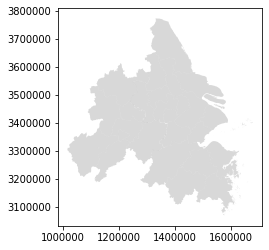

In [25]:
ax=mapfile.plot(color="grey",alpha=0.3)

In [7]:
# Read ci data:
data = pd.read_csv('all.csv', sep=',',skiprows=0,header=0)
#data=data[data["DATE"]==1998.0]
data["DATE"]=data["DATE"].astype(int)
data["DATE"]=data["DATE"].astype(str)+"Y"
data['Coordinates'] = list(zip(data.Lon/100, data.Lat/100))
data['Coordinates'] = data['Coordinates'].apply(Point)

In [9]:
data.head()

,DATE,Stid,Height,Lat,Lon,ci,Coordinates
0,1951Y,56571.0,15907.0,2753.0,10218.0,0.600371,POINT (102.18 27.53)
1,1951Y,58634.0,936.0,2840.0,11815.0,0.541090,POINT (118.15 28.4)
2,1951Y,56492.0,2750.0,2849.0,10432.0,0.701839,POINT (104.32 28.49)
3,1951Y,56386.0,3715.0,2930.0,10345.0,0.705448,POINT (103.45 29.3)
4,1951Y,56385.0,31390.0,2928.0,10341.0,0.695744,POINT (103.41 29.28)


In [26]:
# get geo data
gdf = gpd.GeoDataFrame(data, geometry='Coordinates')
gdf.crs = mapfile.crs

In [27]:
gdf.head()

,DATE,Stid,Height,Lat,Lon,ci,Coordinates
0,1951Y,56571.0,15907.0,2753.0,10218.0,0.600371,POINT (102.18 27.53)
1,1951Y,58634.0,936.0,2840.0,11815.0,0.541090,POINT (118.15 28.4)
2,1951Y,56492.0,2750.0,2849.0,10432.0,0.701839,POINT (104.32 28.49)
3,1951Y,56386.0,3715.0,2930.0,10345.0,0.705448,POINT (103.45 29.3)
4,1951Y,56385.0,31390.0,2928.0,10341.0,0.695744,POINT (103.41 29.28)


In [28]:
cities_with_country = gpd.sjoin(mapfile,gdf,how="inner", op='intersects')

In [29]:
cities_with_country.head()

,ID,geometry,index_right,DATE,Stid,Height,Lat,Lon,ci
